### Постановка целей исследования

**Описание данных**

В Индии произрастают два сорта кофе: Арабика и Робуста. 
Есть 3 таблицы:
1) Отражает засеянную площадь кофейных плантаций в гектарах для каждого сорта кофе по годам.                                                      

2) Отражает урожай зерён (в МТ), урожайность каждого сорта кофе по годам.                                                        
   
3) Отражает процентное соотношения урожая каждого сорта кофе от общего урожая.

**Датасеты взяты с Kaggle**

**Гипотезы**
 1) Производство кофе в Индии быстро росло в 1970-х годах, увеличившись с 68 948 тонн в 1971-72 годах до 120 000 тонн в 1979-80 годах.                     (Wiki)                                                                                                      
 2) В 1980-х годах производство кофе в Индии выросло на 4,6 процента. (Wiki)                                                           
 3) Робуста популярнее Арабики, поэтому его выращивают больше. 

### Обзор данных

**Первое знакомство с данными**

1) Почему в таблицах отличается количество строк, если данные во всех 3-х таблицах представлены с 1950 по 2019 года?
2) Что такое MT? Какая это единица измерения?

Ответ 1: в таблице Prodactivity количество строк больше, потому что сюда дополнительно внесены 1985-86, 1986-87, 1987-88, 1988-89, 1989-90 посевные сезоны. 

Ответ 2: МТ - метрическая тонна, эквивалентная 1000 кг.

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df_area = pd.read_csv('C:/Users/juvoronova/PycharmProjects/projectDataScience/Data/PlantedArea.csv')
display(df_area.head())
display(df_area.tail())

,Year,Arabica (in hectares),Arabica %,Robusta (in hectares),Robusta %,Total (in hectares)
0,1950-51,67613,73,24910,27,92523
1,1960-61,70650,59,49670,41,120320
2,1970-71,80433,59,55030,41,135463
3,1980-81,109454,53,98815,47,208269
4,1990-91,127934,47,142887,53,270821


,Year,Arabica (in hectares),Arabica %,Robusta (in hectares),Robusta %,Total (in hectares)
29,2015-16,221379,51,213057,49,434436
30,2016-17,223816,50,225541,50,449357
31,2017-18,228910,50,225812,50,454722
32,2018-19,233081,51,226814,49,459895
33,2019-20,233186,51,226544,49,459730


In [4]:
df_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   34 non-null     object
 1   Arabica (in hectares)  34 non-null     int64 
 2   Arabica %              34 non-null     int64 
 3   Robusta (in hectares)  34 non-null     int64 
 4   Robusta %              34 non-null     int64 
 5   Total (in hectares)    34 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.7+ KB


In [5]:
df_area['Year'].unique()

array(['1950-51', '1960-61', '1970-71', '1980-81', '1990-91', '1991-92',
       '1992-93', '1993-94', '1994-95', '1995-96', '1996-97', '1997-98',
       '1998-99', '1999-00', '2000-01', '2001-02', '2002–03', '2003-04',
       '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10',
       '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16',
       '2016-17', '2017-18', '2018-19', '2019-20'], dtype=object)

In [6]:
df_productivity = pd.read_csv('C:/Users/juvoronova/PycharmProjects/projectDataScience/Data/Productivity.csv')
display(df_productivity.head())
display(df_productivity.tail())

,Season,Arabica Bearing Area (ha.),Robusta Bearing Area (ha.),Total Bearing Area (ha.),Arabica Production (MT),Robusta Production (MT),Total Production (MT),Arabica Productivity (kg/ha),Robusta Productivity (kg/ha),Overall Productivity (kg/ha)
0,1950-51,67613,24910,92523,15511,3382,18893,229,136,204
1,1960-61,70649,49672,120321,39526,28643,68169,559,577,567
2,1970-71,80433,55030,135463,58348,51883,110231,725,943,814
3,1980-81,98005,92071,190076,61262,57384,118646,625,623,624
4,1985-86,108476,106000,214476,72311,50139,122450,667,473,571


,Season,Arabica Bearing Area (ha.),Robusta Bearing Area (ha.),Total Bearing Area (ha.),Arabica Production (MT),Robusta Production (MT),Total Production (MT),Arabica Productivity (kg/ha),Robusta Productivity (kg/ha),Overall Productivity (kg/ha)
34,2015-16,192734,204413,397147,103500,244500,348000,537,1196,876
35,2016-17,195412,214512,409924,95000,217000,312000,486,1012,761
36,2017-18,198671,214349,413020,95000,221000,316000,478,1031,765
37,2018-19,202218,214523,416741,95000,224500,319500,470,1047,767
38,2019-20,203546,214621,418167,87000,211000,298000,427,983,713


In [7]:
df_productivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Season                        39 non-null     object
 1   Arabica Bearing Area (ha.)    39 non-null     int64 
 2   Robusta Bearing Area (ha.)    39 non-null     int64 
 3   Total Bearing Area (ha.)      39 non-null     int64 
 4   Arabica Production (MT)       39 non-null     int64 
 5   Robusta Production (MT)       39 non-null     int64 
 6   Total Production (MT)         39 non-null     int64 
 7   Arabica Productivity (kg/ha)  39 non-null     int64 
 8   Robusta Productivity (kg/ha)  39 non-null     int64 
 9   Overall Productivity (kg/ha)  39 non-null     int64 
dtypes: int64(9), object(1)
memory usage: 3.2+ KB


In [8]:
df_productivity['Season'].unique()

array(['1950-51', '1960-61', '1970-71', '1980-81', '1985-86', '1986-87',
       '1987-88', '1988-89', '1989-90', '1990-91', '1991-92', '1992-93',
       '1993-94', '1994-95', '1995-96', '1996-97', '1997-98', '1998-99',
       '1999-00', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17',
       '2017-18', '2018-19', '2019-20'], dtype=object)

In [9]:
df_production = pd.read_csv('C:/Users/juvoronova/PycharmProjects/projectDataScience/Data/Production.csv')
display(df_production.head())
display(df_production.tail())

,Year,Arabica (in MT),Arabica %,Robusta (in MT),Robusta %,Total (in MT)
0,1950-1951,15511,82,3382,18,18893
1,1960-1961,39526,58,28643,42,68169
2,1970-1971,58348,53,51883,47,110231
3,1980-1981,61262,52,57384,48,118646
4,1990-1991,78311,46,91415,54,169726


,Year,Arabica (in MT),Arabica %,Robusta (in MT),Robusta %,Total (in MT)
29,2015-2016,103500,30,244500,70,348000
30,2016-2017,95000,30,217000,70,312000
31,2017-2018,95000,30,221000,70,316000
32,2018-2019,95000,30,224500,70,319500
33,2019-2020,87000,29,211000,71,298000


In [10]:
df_production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             34 non-null     object
 1   Arabica (in MT)  34 non-null     int64 
 2   Arabica %        34 non-null     int64 
 3   Robusta (in MT)  34 non-null     int64 
 4   Robusta %        34 non-null     int64 
 5   Total (in MT)    34 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.7+ KB


In [11]:
#df_production.describe()

**Вывод**

Пропусков в данных нет.                                                                                                        
Все таблицы заполнены целыми числами, за исключением первых колонок.                                                           
Таблица df_prodactivity содержит больше строк, чем 2 другие.

### Предобработка данных

In [12]:
df_area = df_area.rename(columns = {
    'Year':'year',
    'Arabica (in hectares)':'arabica_ha',
    'Arabica %':'arabica_planted_per',
    'Robusta (in hectares)':'robusta_ha',
    'Robusta %':'robusta_planted_per',
    'Total (in hectares)':'total_ha'
})

# display(df_area.head(10))
# df_area.shape

In [13]:
df_productivity = df_productivity.rename(columns={
    'Season':'year',
    'Arabica Bearing Area (ha.)': 'arabica_ha',
    'Robusta Bearing Area (ha.)': 'robusta_ha',
    'Total Bearing Area (ha.)': 'total_ha',
    'Arabica Production (MT)': 'arabica_production_mt',
    'Robusta Production (MT)': 'robusta_production_mt',
    'Total Production (MT)': 'total_production_mt',
    'Arabica Productivity (kg/ha)': 'arabica_productivity_kg_ha',
    'Robusta Productivity (kg/ha)': 'robusta_productivity_kg_ha',
    'Overall Productivity (kg/ha)': 'total_productivity_kg_ha'
})
# season=year
# display(df_productivity.head(5))
# df_productivity.shape

In [14]:
df_production = df_production.rename(columns={
    'Year':'year',
    'Arabica (in MT)':'arabica_production_mt',
    'Arabica %':'arabica_prodaction_per',
    'Robusta (in MT)':'robusta_production_mt',
    'Robusta %':'robusta_prodaction_per',
    'Total (in MT)':'total_production_mt'
})

#display(df_production.head(5))
#df_production.shape

In [15]:
# сохраню информацию по 80-м годам отдельно
df_80e = df_productivity[4:9]
#display(df_80e)

In [16]:
# вырежу эти данные из df_prodactivity

delete_years = ['1985-86', '1986-87', '1987-88', '1988-89', '1989-90']
for index in range(len(delete_years)):
    df_productivity = df_productivity.loc[df_productivity.loc[:, 'year'] != delete_years[index]]

# изменю индексы для большего удобства
df_productivity = df_productivity.reset_index(drop=True)
#display(df_productivity.head(6))

In [73]:
# объединю данные из 3-х таблиц в одну большую таблицу
def add_col(data, col):
    _add = data[col]
    df_productivity.loc[:, col] = _add
    return df_productivity

df = add_col(df_area, 'arabica_planted_per')
df = add_col(df_area, 'robusta_planted_per')
df = add_col(df_production, 'arabica_prodaction_per')
df = add_col(df_production, 'robusta_prodaction_per')

display(df.head())

# создала из 3-х таблиц один датасет


,year,arabica_ha,robusta_ha,total_ha,arabica_production_mt,robusta_production_mt,total_production_mt,arabica_productivity_kg_ha,robusta_productivity_kg_ha,total_productivity_kg_ha,arabica_planted_per,robusta_planted_per,arabica_prodaction_per,robusta_prodaction_per
0,1950-51,67613,24910,92523,15511,3382,18893,229,136,204,73,27,82,18
1,1960-61,70649,49672,120321,39526,28643,68169,559,577,567,59,41,58,42
2,1970-71,80433,55030,135463,58348,51883,110231,725,943,814,59,41,53,47
3,1980-81,98005,92071,190076,61262,57384,118646,625,623,624,53,47,52,48
4,1990-91,108500,115000,223500,78311,91415,169726,722,795,759,47,53,46,54


In [18]:
df.duplicated().sum()
# повторяющихся данных нет

0

In [19]:
df.isna().sum()
# незаполненных ячеек нет

year                          0
arabica_ha                    0
robusta_ha                    0
total_ha                      0
arabica_production_mt         0
robusta_production_mt         0
total_production_mt           0
arabica_productivity_kg_ha    0
robusta_productivity_kg_ha    0
total_productivity_kg_ha      0
arabica_planted_per           0
robusta_planted_per           0
arabica_prodaction_per        0
robusta_prodaction_per        0
dtype: int64

In [20]:
# df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   year                        34 non-null     object
 1   arabica_ha                  34 non-null     int64 
 2   robusta_ha                  34 non-null     int64 
 3   total_ha                    34 non-null     int64 
 4   arabica_production_mt       34 non-null     int64 
 5   robusta_production_mt       34 non-null     int64 
 6   total_production_mt         34 non-null     int64 
 7   arabica_productivity_kg_ha  34 non-null     int64 
 8   robusta_productivity_kg_ha  34 non-null     int64 
 9   total_productivity_kg_ha    34 non-null     int64 
 10  arabica_planted_per         34 non-null     int64 
 11  robusta_planted_per         34 non-null     int64 
 12  arabica_prodaction_per      34 non-null     int64 
 13  robusta_prodaction_per      34 non-null     int64 
d

### Проверка гипотез

***1) Производство кофе в Индии быстро росло в 1970-х годах, увеличившись с 68 948 тонн в 1971-72 годах до 120 000 тонн в 1979-80 годах.***    

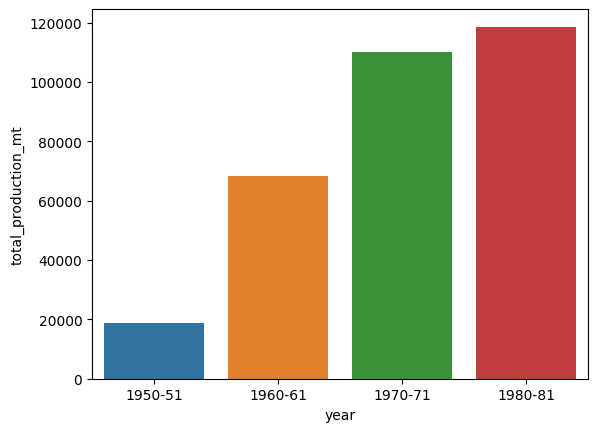

In [34]:
# Полученный урожай кофе в период с 1950 по 1980 годы.  

sns.barplot(x=df['year'][0:4], y=df['total_production_mt'][0:4])

# Посчитаю во сколько раз вырос урожай кофе в 1980 году по сравнению с урожаем 1960-х и 1970-х.
difference_70_60 = "%.2f" % (df['total_production_mt'][2] / df['total_production_mt'][1])
difference_80_60 = "%.2f" % (df['total_production_mt'][3] / df['total_production_mt'][1])

#На сколько процентов увеличился урожай
difference_per = "%2f" % (((df['total_production_mt'][3] - df['total_production_mt'][2]) / df['total_production_mt'][2])*100)

#print(difference_70_60, difference_80_60)

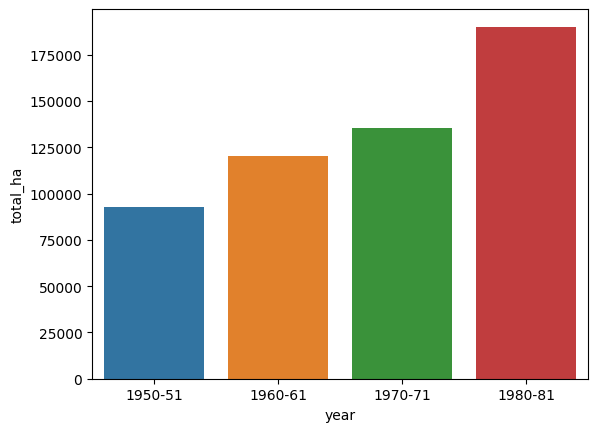

In [33]:
# Количество засеянных гектаров для выращивания кофе в период  с 1950 по 1980 г.
sns.barplot(x=df['year'][0:4], y=df['total_ha'][0:4])

difference_70_60_ha = "%.2f" % (df['total_ha'][2] / df['total_ha'][1])
difference_80_60_ha = "%2f" % (df['total_ha'][3] / df['total_ha'][1])
difference_ha = "%2f" % (((df['total_ha'][3] - df['total_ha'][2]) / df['total_ha'][2])*100)

#print(difference_70_60_ha, difference_80_60_ha)

In [23]:
# Урожайность с 1950 по 1980 г.
#sns.barplot(x=df['year'][0:4], y=df['total_productivity_kg_ha'][0:4])

***Выводы по гипотезе №1***

In [39]:
print('''
Гипотеза подтвердилась частично. 
Производство кофе в 70-х и 80-х годах действительно росло, но счачок произошёл раньше.
''')
print(f'Урожай кофе в 1970 году вырос в {difference_70_60} раза, по сравнению с 1960 гг.')
print(f'При этом засеянная площадь увеличилась незначительно, в {difference_70_60_ha} раза.')
print()
print(f'Урожай в 1980 по сравнению с 1970 вырос на {difference_per} %, при этом посеяли на {difference_ha} % больше')


Гипотеза подтвердилась частично. 
Производство кофе в 70-х и 80-х годах действительно росло, но счачок произошёл раньше.

Урожай кофе в 1970 году вырос в 1.62 раза, по сравнению с 1960 гг.
При этом засеянная площадь увеличилась незначительно, в 1.13 раза.

Урожай в 1980 по сравнению с 1970 вырос на 7.633969 %, при этом посеяли на 40.315806 % больше


***2) В 1980-х годах производство кофе в Индии выросло на 4,6 процента.***

In [37]:
# Есть данные по 80-м

df_80e = df_80e.reset_index(drop=True)
display(df_80e.head())

,year,arabica_ha,robusta_ha,total_ha,arabica_production_mt,robusta_production_mt,total_production_mt,arabica_productivity_kg_ha,robusta_productivity_kg_ha,total_productivity_kg_ha
0,1985-86,108476,106000,214476,72311,50139,122450,667,473,571
1,1986-87,108500,107000,215500,88975,103119,192094,820,964,891
2,1987-88,108500,109500,218000,64556,58157,122713,595,531,563
3,1988-89,108500,112500,221000,94781,119934,214715,874,1066,972
4,1989-90,108500,112500,221000,62572,55481,118053,577,493,534


In [47]:
# Посчитаю разницу в урожае в процентах

difference_prod = ((df_80e['total_production_mt'][4] -  df_80e['total_production_mt'][0])/df_80e['total_production_mt'][4])*100
difference_prod = "%2f" % difference_prod

print(difference_prod)

-3.724598


<AxesSubplot:xlabel='total_production_mt', ylabel='year'>

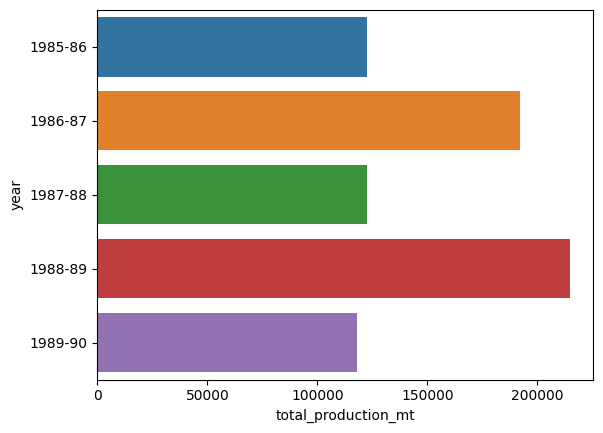

In [40]:
sns.barplot(x=df_80e['total_production_mt'], y=df_80e['year'])

In [43]:
diff_prod = ((df_80e['total_productivity_kg_ha'][4] -  df_80e['total_productivity_kg_ha'][0])/df_80e['total_productivity_kg_ha'][4])*100
diff_prod = "%2f" % diff_prod

print(diff_prod)

-6.928839


<AxesSubplot:xlabel='total_productivity_kg_ha', ylabel='year'>

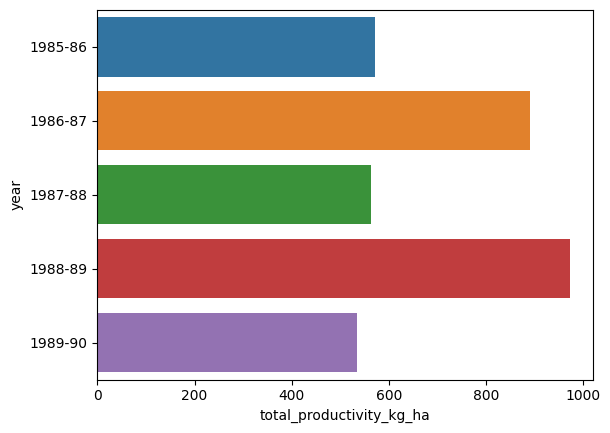

In [48]:
# Урожайность с 1985 по 1990
sns.barplot(x=df_80e['total_productivity_kg_ha'], y=df_80e['year'])

# велина зависимая от количества урожая

<AxesSubplot:xlabel='year', ylabel='total_ha'>

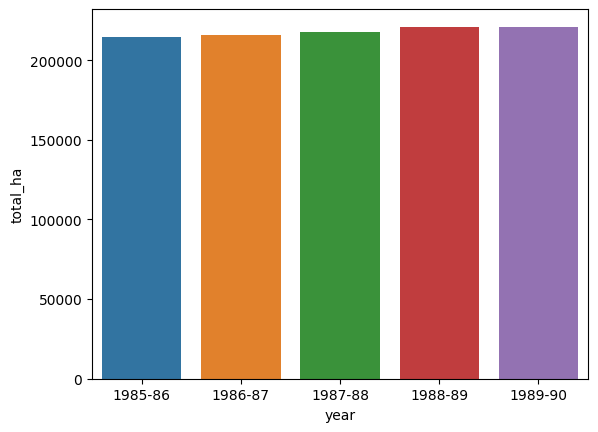

In [46]:
# Засеянные га с 1985 по 1990 г.
sns.barplot(x=df_80e['year'], y=df_80e['total_ha'])

***Выводы по гипотезе №2***

Гипотеза не подтвердилась.

Урожай 1989-1890 г меньше урожая 1985-86 на 3.7 %. 
На графиках видно, что засеиваемая площадь за эти годы почти не изменилась, при этом график урожая изменяется скачкообразно. 


Можно предположить, что 1985-86, 1987-88 и 1989-90 менее удачные посевные сезоны из-за климатических условий (эта гипотеза не подтверждена).

***3) Робуста популярнее Арабики, поэтому его выращивают больше.***

<AxesSubplot:xlabel='year', ylabel='arabica_ha'>

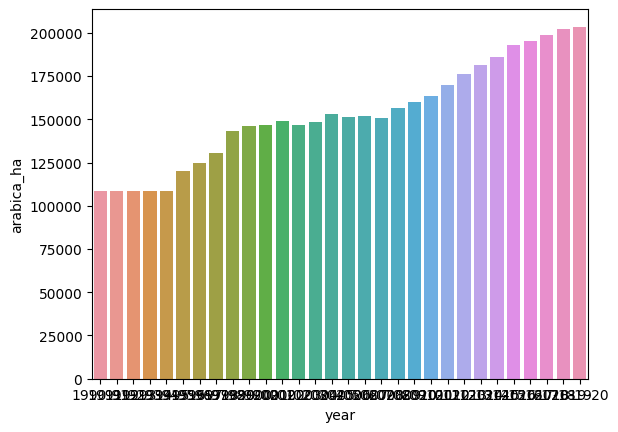

In [62]:
# Площадь засеянная сортом Арабика с 1990 по 2019 г.
df_filtr = df.loc[df.loc[:, 'year'] > '1980-81']
#display(df_filtr.head())
sns.barplot(x=df_filtr['year'], y=df_filtr['arabica_ha'])

<AxesSubplot:xlabel='year', ylabel='robusta_ha'>

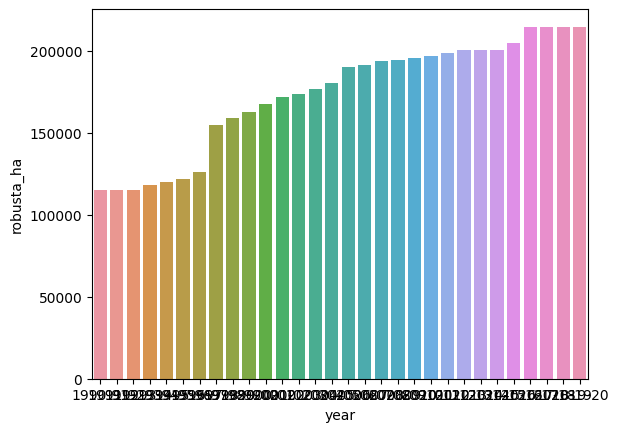

In [63]:
sns.barplot(x=df_filtr['year'], y=df_filtr['robusta_ha'])

<AxesSubplot:xlabel='year', ylabel='arabica_planted_per'>

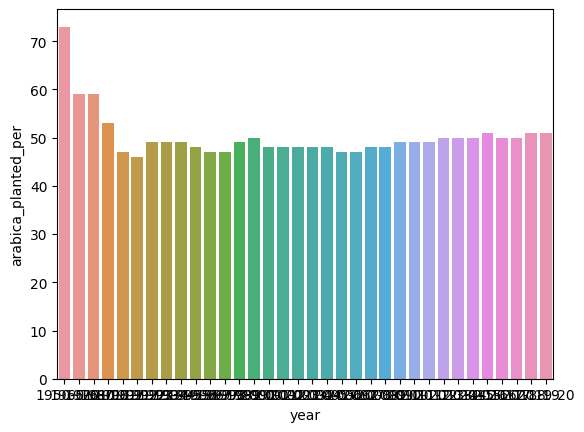

In [70]:
sns.barplot(x=df['year'], y=df['arabica_planted_per'])

<AxesSubplot:xlabel='year', ylabel='robusta_planted_per'>

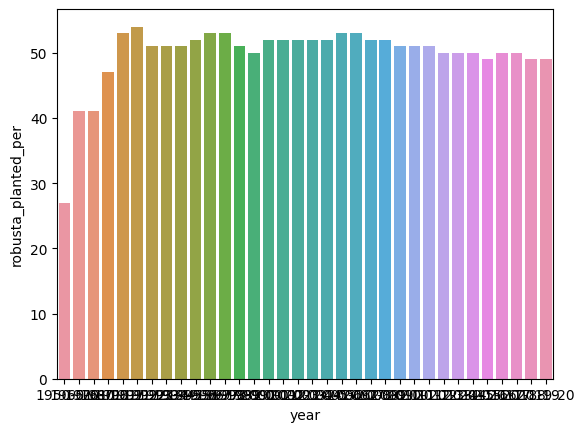

In [69]:
sns.barplot(x=df['year'], y=df['robusta_planted_per'])

***Вывод по гипотезе №3**

Гипотеза не подтвердилась.

С 1990 г площадь засеиваемых полей под оба сотра кофе увеличивается. 
На графиках засеянной площади по сотрам за весь период видно, что в 1950-х - 1970-х годах арабикой засеивали больше. Со временем показатели выровнялись.


<AxesSubplot:xlabel='year', ylabel='arabica_productivity_kg_ha'>

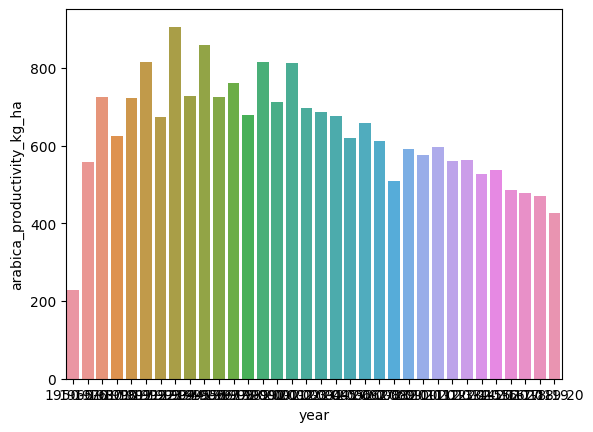

In [76]:
# Урожайность сортов по годам
# Арабика
sns.barplot(x=df['year'], y=df['arabica_productivity_kg_ha'])

<AxesSubplot:xlabel='year', ylabel='robusta_productivity_kg_ha'>

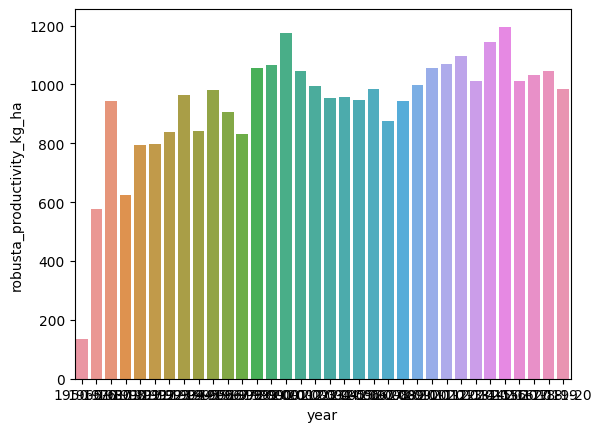

In [77]:
# Робуста
sns.barplot(x=df['year'], y=df['robusta_productivity_kg_ha'])

<AxesSubplot:xlabel='year', ylabel='total_productivity_kg_ha'>

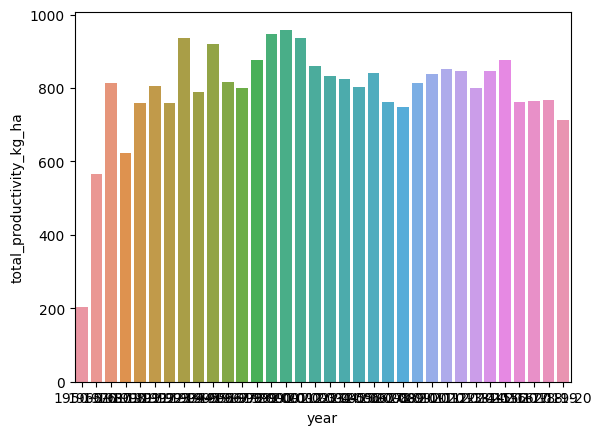

In [78]:
# Общая урожайность
sns.barplot(x=df['year'], y=df['total_productivity_kg_ha'])

<AxesSubplot:xlabel='year', ylabel='total_production_mt'>

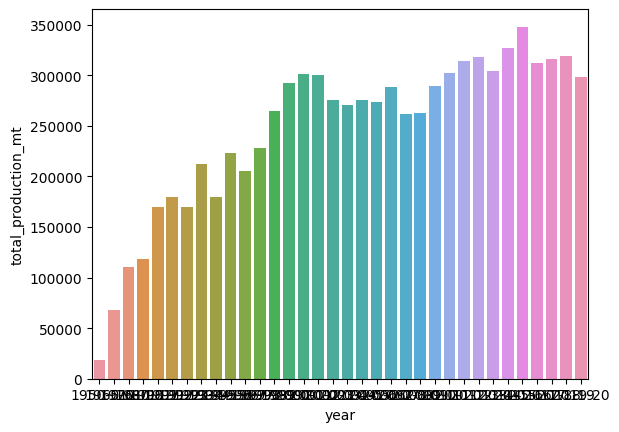

In [79]:
# Общий урожай
sns.barplot(x=df['year'], y=df['total_production_mt'])

<AxesSubplot:xlabel='year', ylabel='total_ha'>

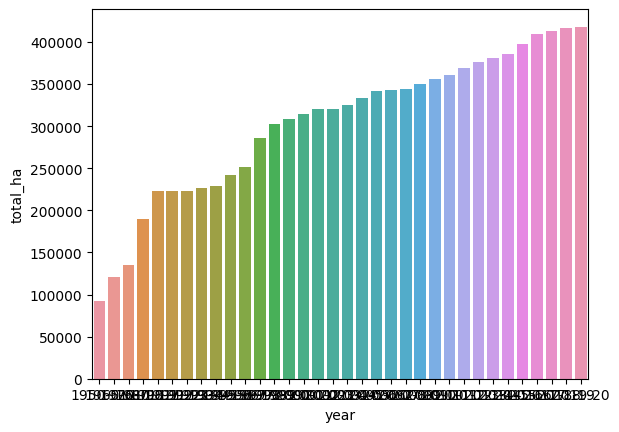

In [80]:
# Общая засеянная площадь
sns.barplot(x=df['year'], y=df['total_ha'])

Интересно, что количество засеиваемых гектаров увеличивается, при этом 
урожайность и количество урожая падают. 

Возможно, дело в истощении почвы, ухудшении экологической обстановки и климатических условий (гипотеза не подтверждена).

### Выводы

1 гипотеза подтвердилась частично, 2 и 3 не подтвердились.